<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%207/R/Week7_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install packages
install.packages(c("haven", "fixest","modelsummary", "olsrr", "caret","randomForest", "cv", "ISLR2"))
library(tidyverse)
library(data.table)
library(ggplot2)
library(haven)
library(fixest)
library(modelsummary)
library(olsrr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘olsrr’


The following object is mask

In [2]:
rm(list=ls())
#load data
Data.File<-"https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%207/data/AJR2001.dta"
Data<-read_dta(Data.File)

In [3]:
head(Data)

longname,shortnam,logmort0,risk,loggdp,campaign,source0,slave,latitude,neoeuro,⋯,logmortjam,logmortcap250,logmortjam250,wandcafrica,malfal94,wacacontested,mortnaval2250,logmortnaval2250,mortnaval1250,logmortnaval1250
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angola,AGO,5.634789,5.36,7.77,1,0,0,0.1367,0,⋯,5.634789,5.521461,5.521461,1,0.95000,1,250.00,5.521461,250.00,5.521461
Argentina,ARG,4.232656,6.39,9.13,1,0,0,0.3778,0,⋯,4.034241,4.232656,4.034241,0,0.00000,0,30.50,3.417727,15.07,2.712706
Australia,AUS,2.145931,9.32,9.90,0,0,0,0.3000,1,⋯,2.145931,2.145931,2.145931,0,0.00000,0,8.55,2.145931,8.55,2.145931
Burkina Faso,BFA,5.634789,4.45,6.85,1,0,0,0.1444,0,⋯,5.634789,5.521461,5.521461,1,0.95000,1,250.00,5.521461,250.00,5.521461
Bangladesh,BGD,4.268438,5.14,6.88,1,1,0,0.2667,0,⋯,4.268438,4.268438,4.268438,0,0.12008,0,71.41,4.268438,71.41,4.268438
Bahamas,BHS,4.442651,7.50,9.29,0,0,0,0.2683,0,⋯,4.442651,4.442651,4.442651,0,NA,0,85.00,4.442651,85.00,4.442651


In [4]:
dim(Data)

[1] 64 31

In [5]:
str(Data)

tibble [64 × 31] (S3: tbl_df/tbl/data.frame)
 $ longname        : chr [1:64] "Angola" "Argentina" "Australia" "Burkina Faso" ...
  ..- attr(*, "label")= chr "full country name"
  ..- attr(*, "format.stata")= chr "%19s"
 $ shortnam        : chr [1:64] "AGO" "ARG" "AUS" "BFA" ...
  ..- attr(*, "label")= chr "3 letter country name"
  ..- attr(*, "format.stata")= chr "%22s"
 $ logmort0        : num [1:64] 5.63 4.23 2.15 5.63 4.27 ...
  ..- attr(*, "label")= chr "Original Log Settler Mortality"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ risk            : num [1:64] 5.36 6.39 9.32 4.45 5.14 ...
  ..- attr(*, "label")= chr "Exp Risk"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ loggdp          : num [1:64] 7.77 9.13 9.9 6.85 6.88 ...
  ..- attr(*, "label")= chr "Log GDP per capita (PPP) in 1995"
  ..- attr(*, "format.stata")= chr "%9.0g"
 $ campaign        : num [1:64] 1 1 0 1 1 0 1 1 0 1 ...
  ..- attr(*, "label")= chr "Original mortality from campaign"
  ..- attr(*, "format.stata")= chr

`geom_smooth()` using formula = 'y ~ x'


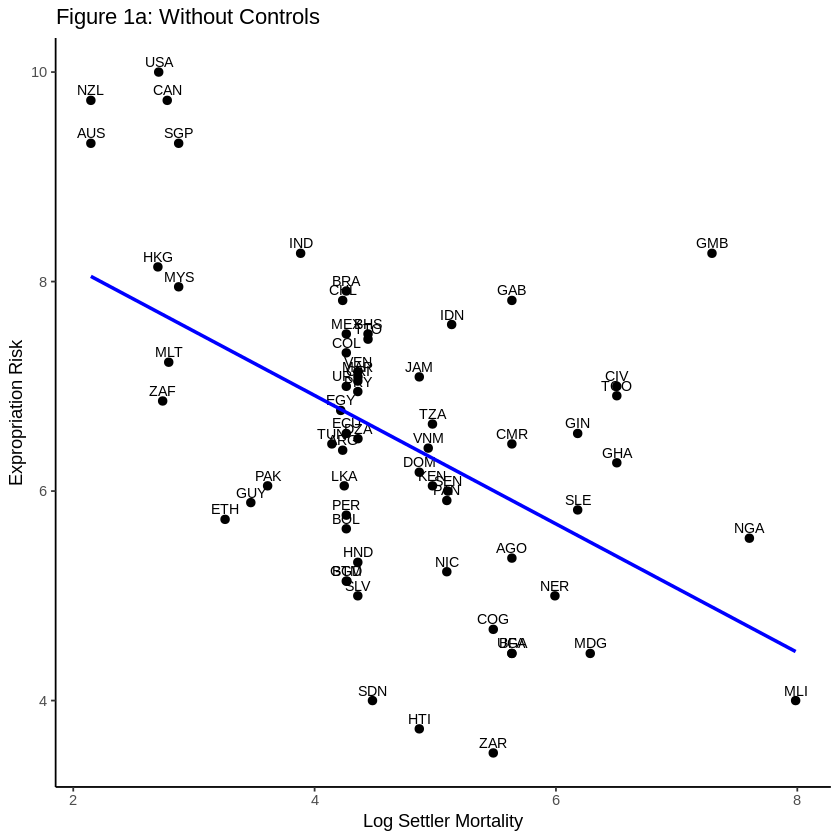

In [6]:
# Fig1b: Remove latitude and continent dummies

ggplot(Data, aes(x = logmort0, y = risk)) +
  # Add scatter points
  geom_point(size = 2) +
  # Add text labels for each point
  geom_text(aes(label = shortnam),
            vjust = -0.5,  # Adjust vertical position of text
            size = 3) +  # Text size
  # Add linear fit line
  geom_smooth(method = "lm",
              se = FALSE,  # Without error bands
              color = "blue") +
  # Customize titles and labels
  labs(title = "Figure 1a: Without Controls",
       x = "Log Settler Mortality",
       y = "Expropriation Risk") +
  # Customize theme and scale
  theme_classic() +  # White background and clean design
  scale_y_continuous(breaks = seq(4, 10, by = 2))

`geom_smooth()` using formula = 'y ~ x'


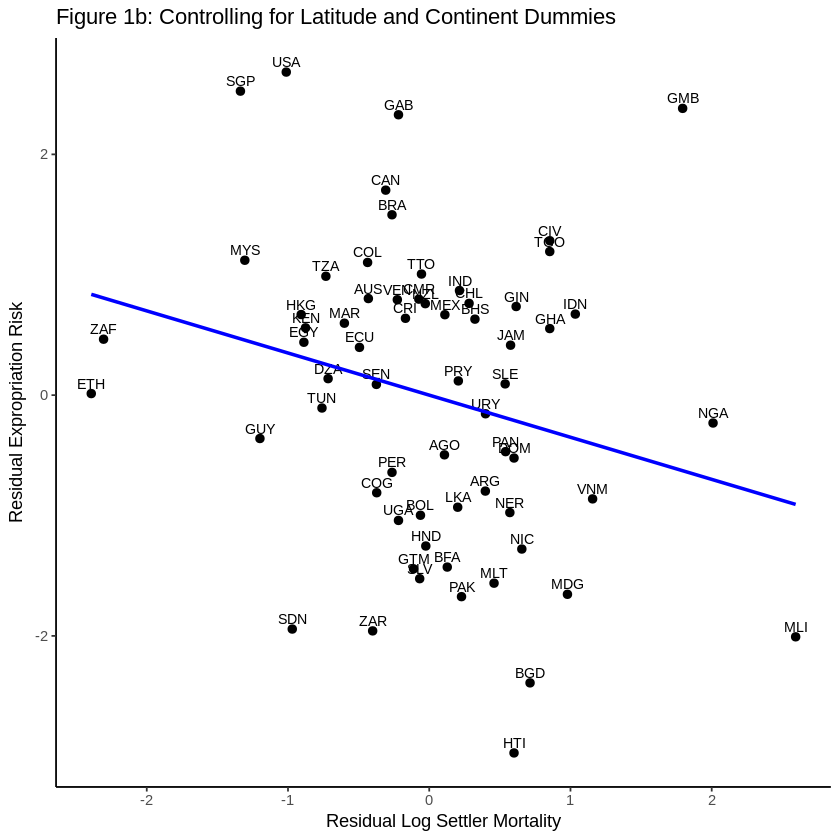

In [7]:
# Fig1b: Remove latitude and continent dummies

model1 <- lm(risk ~ asia + africa + other + latitude, data = Data)
Data$Rrisk <- residuals(model1)

# Second regression to get Rlmort
model2 <- lm(logmort0 ~ asia + africa + other + latitude, data = Data)
Data$Rlmort <- residuals(model2)

ggplot(Data, aes(x = Rlmort, y = Rrisk)) +
  # Add scatter points
  geom_point(size = 2) +
  # Add text labels for each point
  geom_text(aes(label = shortnam),
            vjust = -0.5,  # Adjust vertical position of text
            size = 3) +  # Text size
  # Add linear fit line
  geom_smooth(method = "lm",
              se = FALSE,  # Without error bands
              color = "blue") +
  # Customize titles and labels
  labs(title = "Figure 1b: Controlling for Latitude and Continent Dummies",
       x = "Residual Log Settler Mortality",
       y = "Residual Expropriation Risk") +
  # Customize theme and scale
  theme_classic() +  # White background and clean design
  scale_y_continuous(breaks = seq(-2, 3, by = 2))

In [8]:
# TABLE 1—DESCRIPTIVE STATISTICS
t1data <- read_dta("https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%207/data/maketable1.dta") %>% as.data.table()

In [9]:
table <- function(dt, variables) {
  # Crear una lista vacía para almacenar los resultados
  stats_list <- list()

  # Para cada variable, calcular media y SD
  for(var in variables) {
    stats_list[[var]] <- c(
      mean(dt[[var]], na.rm = TRUE),
      sd(dt[[var]], na.rm = TRUE)
    )
  }

  # Convertir a data.table
  stats_dt <- data.frame(stats_list)

  return(stats_dt)
}

In [10]:
stats_by_mortality <- function(dt, variables) {

  stats_list <- list()


  for(var in variables) {

    stats_list[[var]] <- c(
      # Range 1: < 65.4
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 < 65.4, mean(get(var), na.rm = TRUE)],
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 < 65.4, sd(get(var), na.rm = TRUE)],

      # Range 2: 65.4 - 78.1
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 65.4 & extmort4 < 78.1, mean(get(var), na.rm = TRUE)],
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 65.4 & extmort4 < 78.1, sd(get(var), na.rm = TRUE)],

      # Range 3: 78.1 - 280
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 78.1 & extmort4 < 280, mean(get(var), na.rm = TRUE)],
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 78.1 & extmort4 < 280, sd(get(var), na.rm = TRUE)],

      # Range 4: >= 280
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 280, mean(get(var), na.rm = TRUE)],
      dt[excolony == 1 & !is.na(extmort4) & !is.na(avexpr) &
         !is.na(logpgp95) & extmort4 >= 280, sd(get(var), na.rm = TRUE)]
    )
  }


  stats_dt <- data.frame(stats_list)

  rownames(stats_dt) <- c("Mean_Range1", "SD_Range1",
                         "Mean_Range2", "SD_Range2",
                         "Mean_Range3", "SD_Range3",
                         "Mean_Range4", "SD_Range4")

  return(stats_dt)
}

In [11]:
# table
vars <- c("logpgp95", "loghjypl", "avexpr", "cons00a","cons90", "cons1", "democ00a", "euro1900","logem4")
c1 <- table(t1data, vars)
c2 <- table(t1data[baseco==1,], vars)
c3 <- stats_by_mortality(t1data, vars)

In [12]:
c1

logpgp95,loghjypl,avexpr,cons00a,cons90,cons1,democ00a,euro1900,logem4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.302509,-1.731106,7.066491,1.857143,3.636364,3.590909,1.149425,30.46623,4.595984
1.105342,1.083726,1.804287,1.823132,2.339967,2.414689,2.576859,42.38986,1.303333


In [13]:
c2

logpgp95,loghjypl,avexpr,cons00a,cons90,cons1,democ00a,euro1900,logem4
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.062237,-1.9340524,6.515625,2.250000,3.966667,3.40000,1.644068,16.18095,4.657031
1.043359,0.9807444,1.468647,2.112313,2.262192,2.39491,3.004380,25.53334,1.257984


In [14]:
c3

,logpgp95,loghjypl,avexpr,cons00a,cons90,cons1,democ00a,euro1900,logem4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean_Range1,8.8882003,-1.0254116,7.9042208,3.666667,5.333333,5.166667,3.9166667,31.7307692,3.00904945
SD_Range1,1.2895326,0.8607438,1.5476687,2.994945,2.103388,2.757909,4.5817490,43.9225717,0.59317384
Mean_Range2,8.4076947,-1.4630185,6.4684344,3.277778,5.117647,2.444444,2.7647059,25.5555564,4.28262989
SD_Range2,0.6391374,0.4217214,0.9539449,2.108960,1.798692,1.916560,2.9053703,17.9778377,0.05000571
Mean_Range3,7.7778147,-2.1950824,5.9732620,1.125000,3.312500,3.125000,0.1875000,8.1705882,4.91949152
SD_Range3,0.8016637,0.8013878,1.3200475,0.500000,2.182315,2.276694,0.4031129,11.7996697,0.40094017
Mean_Range4,7.1991336,-3.0257517,5.8909091,1.000000,2.266667,3.428571,0.0000000,0.5333333,6.34697345
SD_Range4,0.6261228,0.4766276,1.2958019,0.000000,1.579632,2.138090,0.0000000,2.0655911,0.75383074


In [15]:
table_1 <- cbind(c("log GDP per capita, PPP, in 1995",
                       "log output per worker in 1988",
                       "Average protection against expropriation risk, 1985-1995",
                       "Constraint on executive, 1900",
                       "Constraint on executive in 1990",
                       "Constraint on executive in first year of independence",
                       "Democracy in 1900",
                       "European settlement in 1900",
                       "Log European settler mortality"),
                       t(c1),t(c2),t(c3))


# print table
table_1

,,,,,,Mean_Range1,SD_Range1,Mean_Range2,SD_Range2,Mean_Range3,SD_Range3,Mean_Range4,SD_Range4
logpgp95,"log GDP per capita, PPP, in 1995",8.30250908233024,1.10534220360532,8.06223691999912,1.04335933710721,8.88820028305054,1.28953259039967,8.4076947371165,0.639137378425215,7.77781472486608,0.801663680307713,7.1991335550944,0.626122791814787
loghjypl,log output per worker in 1988,-1.73110567329345,1.08372560496504,-1.93405235735852,0.980744433874765,-1.02541158491602,0.860743817382143,-1.46301845047209,0.421721434537081,-2.19508239428202,0.80138782924831,-3.02575167814891,0.476627579636424
avexpr,"Average protection against expropriation risk, 1985-1995",7.06649138021075,1.80428679698798,6.51562501117587,1.46864715262311,7.90422081947327,1.54766868359858,6.46843436029222,0.953944936925034,5.97326198746176,1.32004754434505,5.890909131368,1.29580193796522
cons00a,"Constraint on executive, 1900",1.85714285714286,1.82313179002768,2.25,2.1123125731718,3.66666666666667,2.99494523651051,3.27777777777778,2.10896003240949,1.125,0.5,1,0
cons90,Constraint on executive in 1990,3.63636363636364,2.33996668697094,3.96666666666667,2.2621923269903,5.33333333333333,2.10338831988828,5.11764705882353,1.79869233546125,3.3125,2.18231528427952,2.26666666666667,1.57963226582585
cons1,Constraint on executive in first year of independence,3.59090909090909,2.41468859340802,3.4,2.39490985641192,5.16666666666667,2.7579087378049,2.44444444444444,1.9165600993392,3.125,2.27669350887056,3.42857142857143,2.1380899352994
democ00a,Democracy in 1900,1.14942528735632,2.57685916461044,1.64406779661017,3.00438020382199,3.91666666666667,4.58174903747731,2.76470588235294,2.90537028114976,0.1875,0.403112887414928,0,0
euro1900,European settlement in 1900,30.4662338580404,42.3898622760707,16.1809526076393,25.533342517774,31.7307692307692,43.9225717335894,25.5555563502842,17.9778376648363,8.17058823389165,11.7996697369478,0.533333333333333,2.06559111797729
logem4,Log European settler mortality,4.59598383410224,1.30333347640077,4.65703105926514,1.25798364047091,3.00904944964818,0.593173837178757,4.28262988726298,0.0500057121228114,4.9194915154401,0.4009401655174,6.3469734509786,0.753830739838107


In [16]:
# TABLE 2—OLS REGRESSIONS
t2data <- read_dta("https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%207/data/maketable2.dta") %>% as.data.table()

c1 <- lm(logpgp95 ~ avexpr, data = t2data)
c2 <- lm(logpgp95 ~ avexpr, data = t2data[baseco==1,])
c3 <- lm(logpgp95 ~ avexpr + lat_abst, data = t2data)
c4 <- lm(logpgp95 ~ avexpr + lat_abst + africa + asia + other, data = t2data)
c5 <- lm(logpgp95 ~ avexpr + lat_abst , data = t2data[baseco==1,])
c6 <- lm(logpgp95 ~ avexpr + lat_abst + africa + asia + other, data = t2data[baseco==1,])
c7 <- lm(loghjypl ~ avexpr , data = t2data)
c8 <- lm(loghjypl ~ avexpr , data = t2data[baseco==1,])

In [17]:
modelsummary(list(c1,c2,c3,c4,c5,c6,c7,c8),
             coef_omit = "(Intercept)",
             coef_map = c(
               "avexpr"= "Average risk, 1985–1995",
               "lat_abst" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+-------------------------+----------+----------+----------+-----------+----------+-----------+----------+----------+
|                         | (1)      | (2)      | (3)      | (4)       | (5)      | (6)       | (7)      | (8)      |
+=========================+==========+==========+==========+===========+==========+===========+==========+==========+
| Average risk, 1985–1995 | 0.532*** | 0.522*** | 0.463*** | 0.390***  | 0.468*** | 0.401***  | 0.446*** | 0.457*** |
+-------------------------+----------+----------+----------+-----------+----------+-----------+----------+----------+
|                         | (0.041)  | (0.061)  | (0.055)  | (0.051)   | (0.064)  | (0.059)   | (0.039)  | (0.061)  |
+-------------------------+----------+----------+----------+-----------+----------+-----------+----------+----------+
| Latitude                |          |          | 0.872+   | 0.333     | 1.577*   | 0.875     |          |          |
+-------------------------+----------+----------+------

In [18]:
# TABLE 4—IV REGRESSIONS OF LOG GDP PER CAPITA

# Panel C: OLS
ols1 <- lm(loggdp ~ risk, data = Data)
ols2 <- lm(loggdp ~ risk + latitude, data = Data)
ols3 <- lm(loggdp ~ risk + latitude + africa + asia + other, data = Data)

# table
modelsummary(list(ols1,ols2, ols3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "risk"= "Expropriation risk",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+-----------------------+----------+----------+-----------+
|                       | (1)      | (2)      | (3)       |
+=======================+==========+==========+===========+
| Expropriation risk    | 0.516*** | 0.457*** | 0.396***  |
+-----------------------+----------+----------+-----------+
|                       | (0.063)  | (0.065)  | (0.060)   |
+-----------------------+----------+----------+-----------+
| Latitude              |          | 1.710*   | 0.978     |
+-----------------------+----------+----------+-----------+
|                       |          | (0.722)  | (0.641)   |
+-----------------------+----------+----------+-----------+
| Africa Dummy          |          |          | -0.879*** |
+-----------------------+----------+----------+-----------+
|                       |          |          | (0.173)   |
+-----------------------+----------+----------+-----------+
| Asia Dummy            |          |          | -0.651**  |
+-----------------------+----------+---

In [19]:
# Panel B: First Stage
fs1 <- feols(risk ~ logmort0, data = Data)
fs2 <- feols(risk ~ logmort0 + latitude, data = Data)
fs3 <- feols(risk ~ logmort0 + latitude + africa + asia + other, data = Data)

# table
modelsummary(list(fs1,fs2, fs3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "logmort0"= "Log European settler mortality",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+--------------------------------+-----------+-----------+---------+
|                                | (1)       | (2)       | (3)     |
+================================+===========+===========+=========+
| Log European settler mortality | -0.613*** | -0.517*** | -0.350+ |
+--------------------------------+-----------+-----------+---------+
|                                | (0.127)   | (0.141)   | (0.182) |
+--------------------------------+-----------+-----------+---------+
| Latitude                       |           | 2.007     | 2.001   |
+--------------------------------+-----------+-----------+---------+
|                                |           | (1.330)   | (1.383) |
+--------------------------------+-----------+-----------+---------+
| Africa Dummy                   |           |           | -0.257  |
+--------------------------------+-----------+-----------+---------+
|                                |           |           | (0.406) |
+--------------------------------

In [20]:
# Panel A: 2SLS (IV) regressions
iv1 <- feols(loggdp ~ 1 | risk ~ logmort0, data = Data)
iv2 <- feols(loggdp ~ latitude | risk ~ logmort0, data = Data)
iv3 <- feols(loggdp ~ latitude + africa + asia + other | risk ~ logmort0, data = Data)

# table
modelsummary(list(iv1,iv2, iv3),
             coef_omit = "(Intercept)",
             coef_map = c(
               "fit_risk"= "Expropriation risk",
               "latitude" = "Latitude",
               "africa" = "Africa Dummy",
               "asia" = "Asia Dummy",
               "other" = "Other Continent Dummy"),
             stars = TRUE)


+-----------------------+----------+----------+---------+
|                       | (1)      | (2)      | (3)     |
+=======================+==========+==========+=========+
| Expropriation risk    | 0.929*** | 0.962*** | 1.074*  |
+-----------------------+----------+----------+---------+
|                       | (0.156)  | (0.216)  | (0.438) |
+-----------------------+----------+----------+---------+
| Latitude              |          | -0.417   | -0.994  |
+-----------------------+----------+----------+---------+
|                       |          | (1.308)  | (1.683) |
+-----------------------+----------+----------+---------+
| Africa Dummy          |          |          | -0.451  |
+-----------------------+----------+----------+---------+
|                       |          |          | (0.409) |
+-----------------------+----------+----------+---------+
| Asia Dummy            |          |          | -1.103* |
+-----------------------+----------+----------+---------+
|            

In [21]:
#define controls
controls <- c("campaign",
              "source0",
              "slave",
              "neoeuro",
              "asia",
              "africa",
              "other",
              "campaignsj",
              "campaignsj2",
              "wandcafrica",
              "wacacontested")

#esimate correlation matrix, subset to low correlation covariates
cor_table <- cor(Data[,controls],use='complete.obs')

cor_table<- apply(cor_table,c(1,2),function(x){ifelse(abs(x)>0.5,0,1)})

dim(unique(cor_table))
rowSums(cor_table[,controls])
length(controls)

[1]  7 11

campaign       source0         slave       neoeuro          asia 
            8            10             9             9            10 
       africa         other    campaignsj   campaignsj2   wandcafrica 
            8             9             8             7             8 
wacacontested 
            8

[1] 11

In [22]:
#create all possible combinations
vars <-  list()
for (i in 1: length(controls))
{
  pivot <- c(controls[i],"")
  vars <- append(vars, list(pivot))
}

In [23]:
#create all combinations
all.vars<-expand.grid(vars) # all factorial combinations
all.vars<-data.frame(all.vars)
head(all.vars)
dim(all.vars)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,campaign,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
2,,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
3,campaign,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
4,,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
5,campaign,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
6,,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested


[1] 2048   11

In [24]:
#estimate number of terms in models
all.vars$N.vars<-rowSums(apply(all.vars,2,function(x){ifelse(x!="",1,0)}))
#subset to models with at least 2 vars
dim(all.vars)
all.vars<-subset(all.vars,N.vars>=2)
dim(all.vars)
all.vars$id <-1:nrow(all.vars)
ids <- all.vars[,c("N.vars","id")]
all.vars$id<-NULL
all.vars$N.vars<-NULL
all.vars<-apply(all.vars,2,function(x) {as.character(x)})
#explore object
head(all.vars)

[1] 2048   12

[1] 2036   12

Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11
campaign,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,source0,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
campaign,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,,slave,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
campaign,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested
,source0,,neoeuro,asia,africa,other,campaignsj,campaignsj2,wandcafrica,wacacontested


In [25]:
### lets build a function to evaliate our model
performance_ols<-function(dependent.variable,treatment,controls,DataSet,id)
{
  #test code
  #dependent.variable <- "earnq16"
  #treatment <- "treatmnt"
  #controls <- all.vars[4,]
  #DataSet <- Data
  model<-as.formula(paste(dependent.variable,"~",paste(controls,collapse="+"),"+",treatment,sep=""))
  linear.model<-lm(model, data=DataSet)
  my.SSR <- deviance(linear.model) #residual sum of squares
  my.LL <- logLik(linear.model) # log likelihood statistic
  my.RSquared <- summary(linear.model)$r.squared
  my.aic <- AIC(linear.model) # Akaike information criterion
  my.treatment.effect<-summary(linear.model)$coefficients[treatment,"Estimate"]
  my.treatment.StdEror<-summary(linear.model)$coefficients[treatment,"Std. Error"]
  #my.VIF<-length(which( vif(linear.model)>2.0 ) ) # number of covariates that exceed the 2 threshold as a proxy for multicollinarity
  #  my.cor.e.y<-cor(subset(DataSet[[dependent.variable]],complete.cases(Data[,c(dependent.variable,treatment,subset(controls,controls!=""))])),as.numeric(linear.model$residuals))
  #  my.cor.e.t<-cor(subset(DataSet[[treatment]],complete.cases(Data[,c(dependent.variable,treatment, subset(controls,controls!=""))])),as.numeric(linear.model$residuals))
  my.Percent.Coeff.Sig<-length(which(summary(linear.model)$coefficients[,"Pr(>|t|)"]<0.05))/length(summary(linear.model)$coefficients[,"Pr(>|t|)"])
  results<-data.frame(SSR=my.SSR,
                      LL=my.LL,
                      RSquared=my.RSquared,
                      AIC=my.aic,
                      Effect=my.treatment.effect,
                      Std.Error.Effect=my.treatment.StdEror,
                      #Eps.T=my.cor.e.t,
                      #Eps.Y=my.cor.e.y,
                      #VIF=my.VIF,
                      Percent.Sig=my.Percent.Coeff.Sig ,
                      id = id,
                      #Controls=paste(controls,collapse="+"),
                      row.names=NULL)
  return(results)
}

In [26]:
#test the function
i<- 1
performance_ols("loggdp","risk",as.character(all.vars[i,]),Data,i)


SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.94982,-44.27818,0.7838202,116.5564,0.3385154,0.06466305,0.3846154,1


In [27]:
head(ids)
target_ids<-subset(ids,N.vars==3)$id
length(target_ids)
#for (i in 1:dim(all.vars)[1])
#for (i in 1:10)
results <- list()
for ( i in target_ids)
{
  out <- performance_ols("loggdp","risk",all.vars[i,],Data,i)
  results <- append(results, list(out))
}

,N.vars,id
,<dbl>,<int>
1,11,1
2,10,2
3,10,3
4,9,4
5,10,5
6,9,6


[1] 165

In [28]:
#post-process
#results
results <- do.call("rbind",results)
dim(results)
head(results)
summary(results)

[1] 165   8

,SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,22.13856,-56.84208,0.6798683,125.6842,0.3850847,0.05800456,0.6,256
2,22.08356,-56.76248,0.6806636,125.5250,0.3812640,0.05874839,0.6,384
3,21.41850,-55.78397,0.6902806,123.5679,0.3597217,0.05982552,0.6,448
4,22.09056,-56.77262,0.6805624,125.5452,0.3846981,0.05789933,0.6,480
5,18.86641,-51.72407,0.7271848,115.4481,0.4001782,0.05362606,0.8,496
6,21.31878,-55.63463,0.6917227,123.2693,0.3296851,0.06773549,0.6,504


      SSR              LL            RSquared           AIC       
 Min.   :18.13   Min.   :-68.69   Min.   :0.5364   Min.   :112.9  
 1st Qu.:21.91   1st Qu.:-66.08   1st Qu.:0.5727   1st Qu.:125.0  
 Median :24.79   Median :-60.46   Median :0.6416   Median :132.9  
 Mean   :25.63   Mean   :-61.11   Mean   :0.6294   Mean   :134.2  
 3rd Qu.:29.55   3rd Qu.:-56.51   3rd Qu.:0.6832   3rd Qu.:144.2  
 Max.   :32.06   Max.   :-50.46   Max.   :0.7378   Max.   :149.4  
     Effect       Std.Error.Effect   Percent.Sig           id      
 Min.   :0.3297   Min.   :0.05305   Min.   :0.4000   Min.   : 256  
 1st Qu.:0.3894   1st Qu.:0.06010   1st Qu.:0.6000   1st Qu.:1015  
 Median :0.4307   Median :0.06410   Median :0.6000   Median :1630  
 Mean   :0.4315   Mean   :0.06510   Mean   :0.6036   Mean   :1488  
 3rd Qu.:0.4716   3rd Qu.:0.06929   3rd Qu.:0.6000   3rd Qu.:1900  
 Max.   :0.5437   Max.   :0.08038   Max.   :1.0000   Max.   :2033  

In [29]:
#choose a model
decision <- subset(results, Percent.Sig>=0.8)
decision <- subset(decision, AIC<as.numeric(quantile(results$AIC,0.25)))
decision <- decision[order(decision$Std.Error.Effect),]
decision <- decision[order(decision$AIC),]
head(decision)
dim(decision)

,SSR,LL,RSquared,AIC,Effect,Std.Error.Effect,Percent.Sig,id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
74,18.13452,-50.45796,0.7377682,112.9159,0.4172014,0.05305049,0.8,1517
75,18.47357,-51.05073,0.7328654,114.1015,0.3829724,0.05485689,0.8,1518
67,18.72077,-51.47609,0.7292908,114.9522,0.4012214,0.05333097,0.8,1487
62,18.81326,-51.63380,0.7279533,115.2676,0.3860550,0.05644742,0.8,1455
5,18.86641,-51.72407,0.7271848,115.4481,0.4001782,0.05362606,0.8,496
72,18.89984,-51.78072,0.7267014,115.5614,0.3742853,0.06504374,0.8,1511


[1] 25  8

In [30]:
target_models <- c(72,74)
model1<-as.formula(paste("loggdp","~",paste(as.character(all.vars[target_models[1],]),collapse="+"),"+","risk",sep=""))
model2<-as.formula(paste("loggdp","~",paste(as.character(all.vars[target_models[2],]),collapse="+"),"+","risk",sep=""))
lm(model1,data=Data)
lm(model2,data=Data)


Call:
lm(formula = model1, data = Data)

Coefficients:
  (Intercept)        neoeuro           asia         africa     campaignsj  
       6.1344         0.1748        -0.7597        -0.3158        -0.3177  
  campaignsj2    wandcafrica  wacacontested           risk  
       0.3953        -0.9272         0.2475         0.3549  



Call:
lm(formula = model2, data = Data)

Coefficients:
  (Intercept)        source0          slave           asia         africa  
      6.02872       -0.33940        0.01067       -0.66886       -0.14220  
   campaignsj    campaignsj2    wandcafrica  wacacontested           risk  
     -0.42628        0.44847       -0.81701       -0.09260        0.39019  


# Stepwise regresssion

In [31]:
controls

model <- lm(loggdp ~ risk + ., data = Data [,c("loggdp","risk",controls)])

[1] "campaign"      "source0"       "slave"         "neoeuro"      
 [5] "asia"          "africa"        "other"         "campaignsj"   
 [9] "campaignsj2"   "wandcafrica"   "wacacontested"

## All Possible Regression
All subset regression tests all possible subsets of the set of potential independent variables.

If there are K potential independent variables (besides the constant), then there are 2k distinct subsets of them to be tested.

For example, if you have 10 candidate independent variables, the number of subsets to be tested is 210 ,which is 1024, and if you have 20 candidate variables, the number is 220, which is more than one millio

In [32]:
all <- ols_step_all_possible(model)

head(all)

,mindex,n,predictors,rsquare,adjr,rmse,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,risk,0.5237011593,0.516018920,0.7173980,0.49753767,52.36591,145.1122,-38.6042174,151.5888,34.00130,0.5478637,0.5070278,0.008709209
11,2,1,wandcafrica,0.4300243038,0.420831147,0.7847811,0.39659488,74.46566,156.6033,-27.6662651,163.0799,40.68856,0.6556157,0.6067483,0.010422107
7,3,1,africa,0.3424053905,0.331799026,0.8429455,0.30075686,95.13625,165.7550,-18.9092364,172.2316,46.94336,0.7563995,0.7000201,0.012024234
5,4,1,neoeuro,0.2266282115,0.214154473,0.9141438,0.19898710,122.44979,176.1339,-8.9300651,182.6106,55.20829,0.8895724,0.8232667,0.014141241
8,5,1,other,0.1232728542,0.109132094,0.9733132,0.09175650,146.83284,184.1618,-1.1783856,190.6385,62.58646,1.0084571,0.9332902,0.016031112
12,6,1,wacacontested,0.1165961233,0.102347674,0.9770123,0.07041662,148.40798,184.6474,-0.7086646,191.1240,63.06309,1.0161371,0.9403977,0.016153197
2,7,1,campaign,0.0977566525,0.083204340,0.9873752,0.03083461,152.85249,185.9979,0.5983458,192.4745,64.40797,1.0378072,0.9604526,0.016497680
4,8,1,slave,0.0817281144,0.066917278,0.9961071,0.04260103,156.63386,187.1249,1.6896080,193.6015,65.55220,1.0562440,0.9775152,0.016790765
9,9,1,campaignsj,0.0400518839,0.024568850,1.0184606,-0.02959642,166.46589,189.9655,4.4425130,196.4422,68.52731,1.1041822,1.0218803,0.017552822


## Best Subset Regression
Select the subset of predictors that do the best at meeting some well-defined objective criterion, such as having the largest R2 value or the smallest MSE, Mallow’s Cp or AIC.

In [33]:
best_subset <- ols_step_best_subset(model)
best_subset

                                               Best Subsets Regression                                               
---------------------------------------------------------------------------------------------------------------------
Model Index    Predictors
---------------------------------------------------------------------------------------------------------------------
     1         risk                                                                                                   
     2         risk wandcafrica                                                                                       
     3         risk asia wandcafrica                                                                                  
     4         risk source0 asia wandcafrica                                                                          
     5         risk campaign source0 asia wandcafrica                                                                 
     6         risk campa

## Stepwise Selection
Stepwise regression is a method of fitting regression models that involves the iterative selection of independent variables to use in a model.

It can be achieved through forward selection, backward elimination, or a combination of both methods.
The forward selection approach starts with no variables and adds each new variable incrementally, testing for statistical significance, while the backward elimination method begins with a full model and then removes the least statistically significant variables one at a time.


In [34]:
# stepwise forward regression
ols_step_forward_p(model)



                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     190.582    194.899      6.438    0.00000    0.00000 
 1      risk           145.112    151.589    -38.604    0.52370    0.51602 
 2      wandcafrica    122.431    131.067    -60.220    0.67611    0.66549 
 3      asia           114.224    125.019    -67.541    0.72386    0.71005 
 4      source0        112.916    125.869    -68.365    0.73777    0.71999 
 5      campaign       111.317    126.429    -69.193    0.75211    0.73074 
 6      campaignsj2    106.834    124.105    -71.925    0.77599    0.75241 
 7      campaignsj     107.015    126.445    -70.795    0.78227    0.75505 
--------------------------------------------------------------------------

Final Model

In [35]:
# stepwise backward regression
ols_step_backward_p(model)



                               Stepwise Summary                               
----------------------------------------------------------------------------
Step    Variable           AIC        SBC       SBIC        R2       Adj. R2 
----------------------------------------------------------------------------
 0      Full Model       116.556    146.781    -58.570    0.78382    0.73295 
 1      neoeuro          114.569    142.634    -61.073    0.78378    0.73804 
 2      other            112.614    138.521    -63.556    0.78363    0.74280 
 3      wacacontested    110.695    134.443    -66.013    0.78335    0.74724 
 4      slave            108.779    130.368    -68.461    0.78307    0.75151 
 5      africa           107.015    126.445    -70.795    0.78227    0.75505 
----------------------------------------------------------------------------

Final Model Output 
------------------

                         Model Summary                          
------------------------------------

###The criteria for selecting variables may be one of the following:
* p value
* akaike information criterion (aic)
* schwarz bayesian criterion (sbc)
* sawa bayesian criterion (sbic)
* r-square
* adjusted r-square

In [36]:
#for example using AIC
ols_step_both_aic(model)



                                Stepwise Summary                                
------------------------------------------------------------------------------
Step    Variable             AIC        SBC       SBIC        R2       Adj. R2 
------------------------------------------------------------------------------
 0      Base Model         190.582    194.899      6.438    0.00000    0.00000 
 1      risk (+)           145.112    151.589    -38.604    0.52370    0.51602 
 2      wandcafrica (+)    122.431    131.067    -60.220    0.67611    0.66549 
 3      asia (+)           114.224    125.019    -67.541    0.72386    0.71005 
 4      source0 (+)        112.916    125.869    -68.365    0.73777    0.71999 
 5      campaign (+)       111.317    126.429    -69.193    0.75211    0.73074 
 6      campaignsj2 (+)    106.834    124.105    -71.925    0.77599    0.75241 
------------------------------------------------------------------------------

Final Model Output 
------------------


In [37]:
#show progress
# adjusted r-square
ols_step_forward_adj_r2(model, progress = TRUE)


Forward Selection Method 
------------------------

Candidate Terms: 

1. risk 
2. campaign 
3. source0 
4. slave 
5. neoeuro 
6. asia 
7. africa 
8. other 
9. campaignsj 
10. campaignsj2 
11. wandcafrica 
12. wacacontested 


Variables Entered: 

=> risk 
=> wandcafrica 
=> asia 
=> source0 
=> campaign 
=> campaignsj2 
=> campaignsj 

No more variables to be added.




                              Stepwise Summary                              
--------------------------------------------------------------------------
Step    Variable         AIC        SBC       SBIC        R2       Adj. R2 
--------------------------------------------------------------------------
 0      Base Model     190.582    194.899      6.438    0.00000    0.00000 
 1      risk           145.112    151.589    -38.604    0.52370    0.51602 
 2      wandcafrica    122.431    131.067    -60.220    0.67611    0.66549 
 3      asia           114.224    125.019    -67.541    0.72386    0.71005 
 4      source0        112.916    125.869    -68.365    0.73777    0.71999 
 5      campaign       111.317    126.429    -69.193    0.75211    0.73074 
 6      campaignsj2    106.834    124.105    -71.925    0.77599    0.75241 
 7      campaignsj     107.015    126.445    -70.795    0.78227    0.75505 
--------------------------------------------------------------------------

Final Model

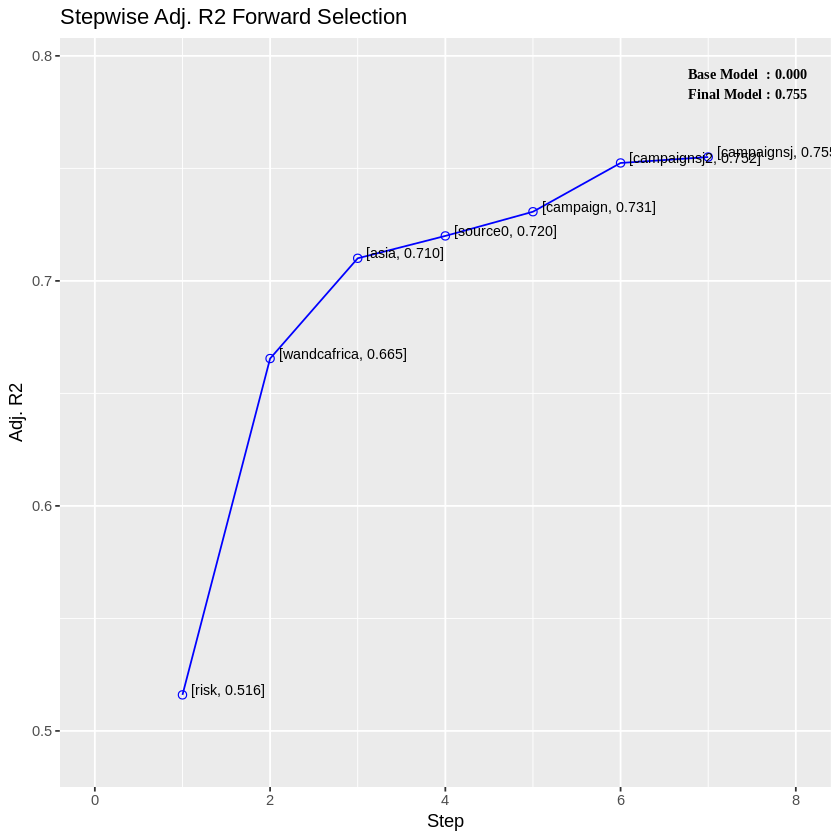

In [38]:
#plot output
# adjusted r-square
k <- ols_step_forward_adj_r2(model)
plot(k)


## Cross Validation using `library "caret" `

In [39]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [40]:
#specify the cross-validation method
ctrl <- trainControl(method = "cv", number = 5)

In [41]:
#fit a regression model and use k-fold CV to evaluate performance
model <- train(loggdp ~ .,
               data = Data [complete.cases(Data),c("loggdp","risk",controls)],
               method = "rf")

In [42]:
#view summary of k-fold CV
print(model)

Random Forest 

51 samples
12 predictors

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 51, 51, 51, 51, 51, 51, ... 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
   2    0.7357567  0.6095141  0.6076653
   7    0.7534208  0.5426448  0.5910806
  12    0.8303129  0.4725356  0.6349460

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.


No pre-processing occured. That is, we didn’t scale the data in any way before fitting the models.
The resampling method we used to evaluate the model was cross-validation with 5 folds.
The sample size for each training set was 3954

RMSE: The root mean squared error. This measures the average difference between the predictions made by the model and the actual observations. The lower the RMSE, the more closely a model can predict the actual observations.

Rsquared: This is a measure of the correlation between the predictions made by the model and the actual observations. The higher the R-squared, the more closely a model can predict the actual observations.

MAE: The mean absolute error. This is the average absolute difference between the predictions made by the model and the actual observations. The lower the MAE, the more closely a model can predict the actual observations.


In [43]:
#view final model
model$finalModel


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 0.4880904
                    % Var explained: 59.36

In [44]:
mean(model$finalModel$mse)

[1] 0.5004053

In [45]:
names(model)

[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

## Cross Validation using `library cv`

In [46]:
library("ISLR2")

In [47]:
data("Auto", package="ISLR2")
head(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500


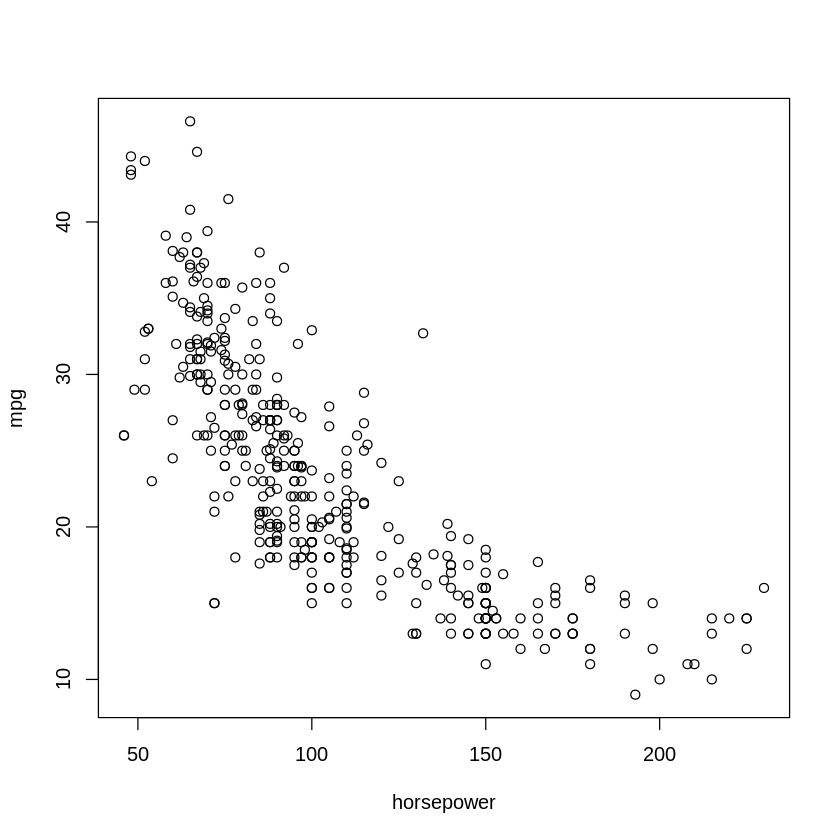

In [48]:
plot(mpg ~ horsepower, data=Auto)

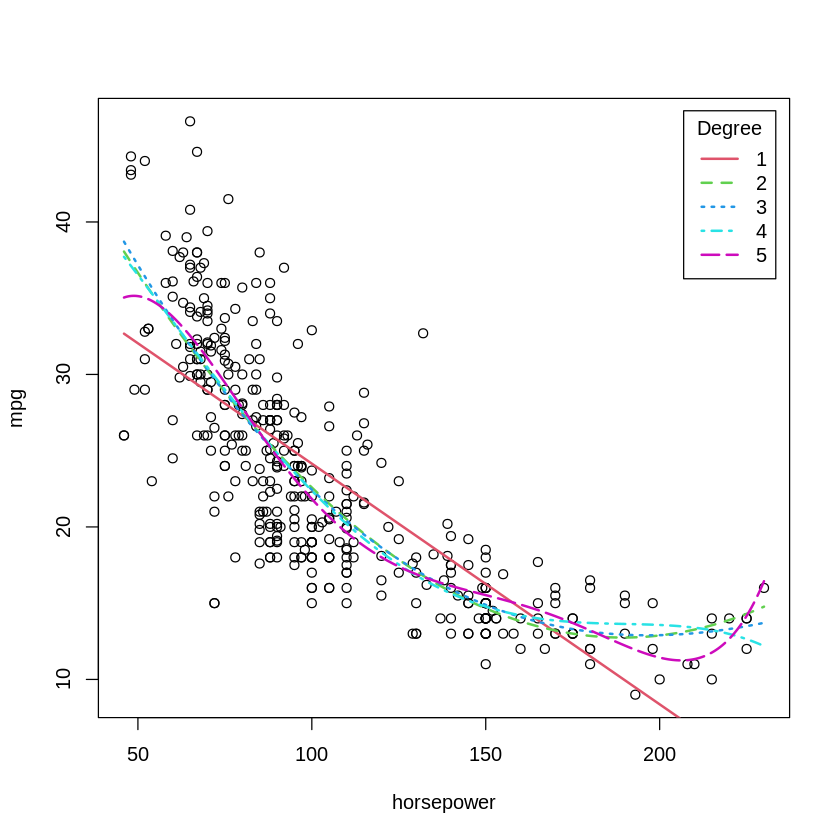

In [49]:
#plot various alternatives
plot(mpg ~ horsepower, data=Auto)
horsepower <- with(Auto,
                   seq(min(horsepower), max(horsepower),
                       length=1000))
for (p in 1:5){
  m <- lm(mpg ~ poly(horsepower,p), data=Auto)
  mpg <- predict(m, newdata=data.frame(horsepower=horsepower))
  lines(horsepower, mpg, col=p + 1, lty=p, lwd=2)
}
legend("topright", legend=1:5, col=2:6, lty=1:5, lwd=2,
       title="Degree", inset=0.02)

In [50]:
library("cv") # for mse() and other functions

Loading required package: doParallel

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel


Attaching package: ‘cv’


The following object is masked from ‘package:fixest’:

    models




In [51]:
var <- mse <- numeric(10)
for (p in 1:10){
  m <- lm(mpg ~ poly(horsepower, p), data=Auto)
  mse[p] <- mse(Auto$mpg, fitted(m))
  var[p] <- summary(m)$sigma^2
}

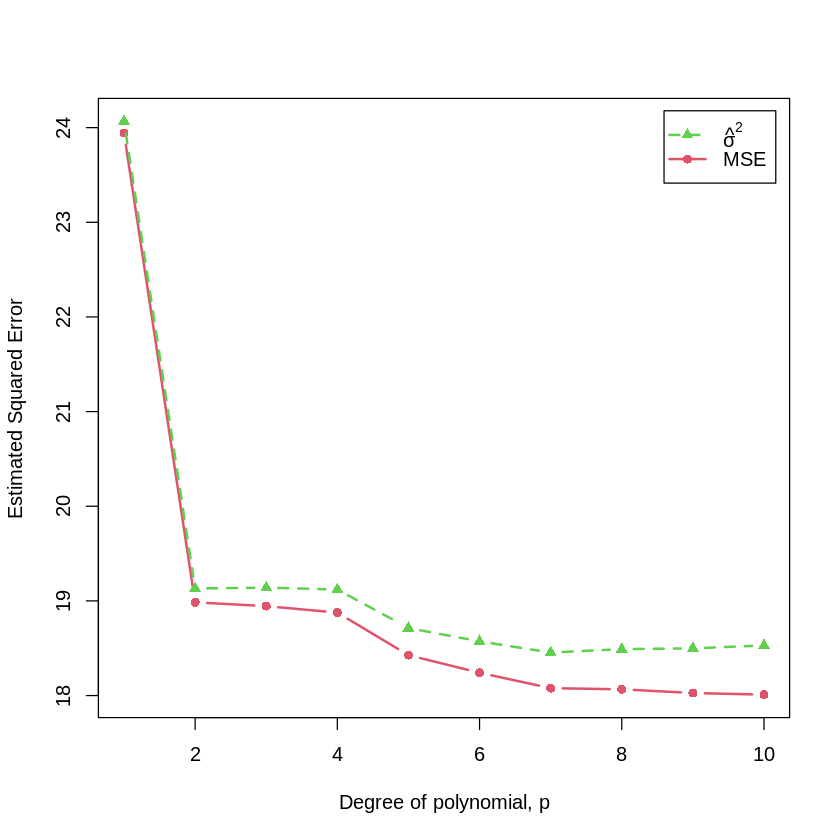

In [52]:
plot(c(1, 10), range(mse, var), type="n",
     xlab="Degree of polynomial, p",
     ylab="Estimated Squared Error")
lines(1:10, mse, lwd=2, lty=1, col=2, pch=16, type="b")
lines(1:10, var, lwd=2, lty=2, col=3, pch=17, type="b")
legend("topright", inset=0.02,
       legend=c(expression(hat(sigma)^2), "MSE"),
       lwd=2, lty=2:1, col=3:2, pch=17:16)

In [53]:
#cross validation with OLS
m.auto <- lm(mpg ~ poly(horsepower, 2), data=Auto)
summary(m.auto)


Call:
lm(formula = mpg ~ poly(horsepower, 2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2209  106.13   <2e-16 ***
poly(horsepower, 2)1 -120.1377     4.3739  -27.47   <2e-16 ***
poly(horsepower, 2)2   44.0895     4.3739   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


In [54]:
#train and test set
cv(m.auto)
as.numeric(cv(m.auto)["CV crit"])

R RNG seed set to 692671



cross-validation criterion (mse) = 19.20252 

R RNG seed set to 507448



[1] 19.20504

In [55]:
#leave one out
cv(m.auto, k="loo")

cross-validation criterion (mse) = 19.24821 

In [56]:
#Comparing competing models
for (p in 1:10){
  assign(paste0("m.", p),
         lm(mpg ~ poly(horsepower, p), data=Auto))
}
objects(pattern="m\\.[0-9]")
summary(m.2)

[1] "m.1"  "m.10" "m.2"  "m.3"  "m.4"  "m.5"  "m.6"  "m.7"  "m.8"  "m.9"


Call:
lm(formula = mpg ~ poly(horsepower, p), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            23.4459     0.2209  106.13   <2e-16 ***
poly(horsepower, p)1 -120.1377     4.3739  -27.47   <2e-16 ***
poly(horsepower, p)2   44.0895     4.3739   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


In [57]:
cv.auto.10 <- cv(models(m.1, m.2, m.3, m.4, m.5,
                        m.6, m.7, m.8, m.9, m.10),
                 data=Auto, seed=2120)
cv.auto.10[1:2]

Model model.1:
cross-validation criterion = 24.24642 

Model model.2:
cross-validation criterion = 19.34601 
